<h1><center> US crime data analysis using linear regression </center></h1>

### Data source
Using crime data from http://www.statsci.org/data/general/uscrime.txt (file uscrime.txt)

description at http://www.statsci.org/data/general/uscrime.html )

We will first explore our data then use `lm` R Function to build a regression model. We will then use the our model to predict the crime rate for our test city

In [2]:
# load dplyr
suppressWarnings(suppressMessages(install.packages("dplyr")))
suppressWarnings(suppressMessages(library(dplyr)))

# Read data into a tibble
uscrime = read.table('uscrime.txt', sep = '\t', header=T) %>% as_tibble()

package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Siham\AppData\Local\Temp\Rtmpuw3DhL\downloaded_packages


In [3]:
# Explore the data
head(uscrime,5)
summary(uscrime)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234


       M               So               Ed             Po1       
 Min.   :11.90   Min.   :0.0000   Min.   : 8.70   Min.   : 4.50  
 1st Qu.:13.00   1st Qu.:0.0000   1st Qu.: 9.75   1st Qu.: 6.25  
 Median :13.60   Median :0.0000   Median :10.80   Median : 7.80  
 Mean   :13.86   Mean   :0.3404   Mean   :10.56   Mean   : 8.50  
 3rd Qu.:14.60   3rd Qu.:1.0000   3rd Qu.:11.45   3rd Qu.:10.45  
 Max.   :17.70   Max.   :1.0000   Max.   :12.20   Max.   :16.60  
      Po2               LF              M.F              Pop        
 Min.   : 4.100   Min.   :0.4800   Min.   : 93.40   Min.   :  3.00  
 1st Qu.: 5.850   1st Qu.:0.5305   1st Qu.: 96.45   1st Qu.: 10.00  
 Median : 7.300   Median :0.5600   Median : 97.70   Median : 25.00  
 Mean   : 8.023   Mean   :0.5612   Mean   : 98.30   Mean   : 36.62  
 3rd Qu.: 9.700   3rd Qu.:0.5930   3rd Qu.: 99.20   3rd Qu.: 41.50  
 Max.   :15.700   Max.   :0.6410   Max.   :107.10   Max.   :168.00  
       NW              U1                U2            

In [4]:
# Build linear regression model on full data with 15 factors
set.seed(42)
model_1 <- lm(Crime ~ ., data = uscrime)

# Model coeffs
model_1$coefficients %>% abs() %>% as.data.frame()

,.
(Intercept),5.984288e+03
M,8.783017e+01
So,3.803450e+00
Ed,1.883243e+02
Po1,1.928043e+02
Po2,1.094219e+02
LF,6.638261e+02
M.F,1.740686e+01
Pop,7.330081e-01
NW,4.204461e+00


By inspecting the model's coefficients, we can see which factors are more important than the others

In [5]:
# Explore model summary
summary(model_1)


Call:
lm(formula = Crime ~ ., data = uscrime)

Residuals:
    Min      1Q  Median      3Q     Max 
-395.74  -98.09   -6.69  112.99  512.67 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.984e+03  1.628e+03  -3.675 0.000893 ***
M            8.783e+01  4.171e+01   2.106 0.043443 *  
So          -3.803e+00  1.488e+02  -0.026 0.979765    
Ed           1.883e+02  6.209e+01   3.033 0.004861 ** 
Po1          1.928e+02  1.061e+02   1.817 0.078892 .  
Po2         -1.094e+02  1.175e+02  -0.931 0.358830    
LF          -6.638e+02  1.470e+03  -0.452 0.654654    
M.F          1.741e+01  2.035e+01   0.855 0.398995    
Pop         -7.330e-01  1.290e+00  -0.568 0.573845    
NW           4.204e+00  6.481e+00   0.649 0.521279    
U1          -5.827e+03  4.210e+03  -1.384 0.176238    
U2           1.678e+02  8.234e+01   2.038 0.050161 .  
Wealth       9.617e-02  1.037e-01   0.928 0.360754    
Ineq         7.067e+01  2.272e+01   3.111 0.003983 ** 
Prob        -4.855e

- Our model is using all 15 factors
- The ${R^2}$ statistic provides a measure of how well the model is fitting the actual data. In our model, our ${R^2} =    0.8031$ or roughly `80%` of the variance found in the response column `Crime`
- The Residual standard error is measure of the quality of the linear regression fit. It is the average amount that the response `Crime` will deviate from the true regression line. In our model, we have `Residual standard error = 209.1` on `31 degrees of freedom` (number of data points that went into the estimation)

In [6]:
# create a test dataFrame
set.seed(42)
test_dataFrame = data.frame(
        M = 14.0,
        So = 0,
        Ed = 10.0,
        Po1 = 12.0,
        Po2 = 15.5,
        LF = 0.640,
        M.F = 94.0 ,
        Pop = 150,
        NW = 1.1,
        U1 = 0.120,
        U2 = 3.6 ,
        Wealth = 3200, 
        Ineq = 20.1 ,
        Prob = 0.04 ,
        Time = 39.0
)
# predict the test point
pred1 <- predict(model_1, test_dataFrame)
cat("Crime rate prediction using all 15 factors to build the model", pred1, "\n")

Crime rate prediction using all 15 factors to build the model 155.4349 


- Using the full 15 factors in our data to build our model led us to a crime rate prediction of `155.4349`, which is half the lowest crime rate we have in our data set. This result is most likely due to overfitting. 
- Using a 15-factor model which includes many factors that aren't significant and have high p-values, will most likely overfit our test data.
- A rule of thumb when using a factor based model is to have at least 10 times as many data points as factors. So, since we only have 47 data points, we at most need to select about 4-5 factors for our model.
- We can sue `PerformanceAnalytics` R package to visualize the correlation matrix chart of our dataset
    - We will split the data column-wise to see the visualization better

In [7]:
suppressWarnings(suppressMessages(install.packages("PerformanceAnalytics")))
suppressWarnings(suppressMessages(library("PerformanceAnalytics")))

package 'PerformanceAnalytics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Siham\AppData\Local\Temp\Rtmpuw3DhL\downloaded_packages


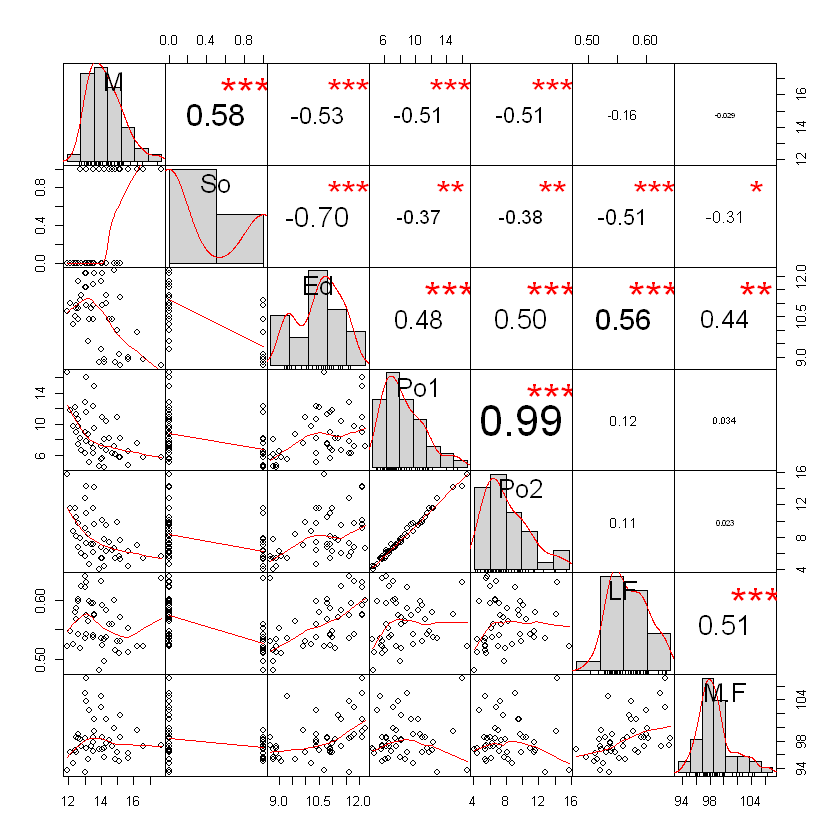

In [8]:
my_data1 <- uscrime[,1:7]
chart.Correlation(my_data1, histogram = TRUE, pch = 25)


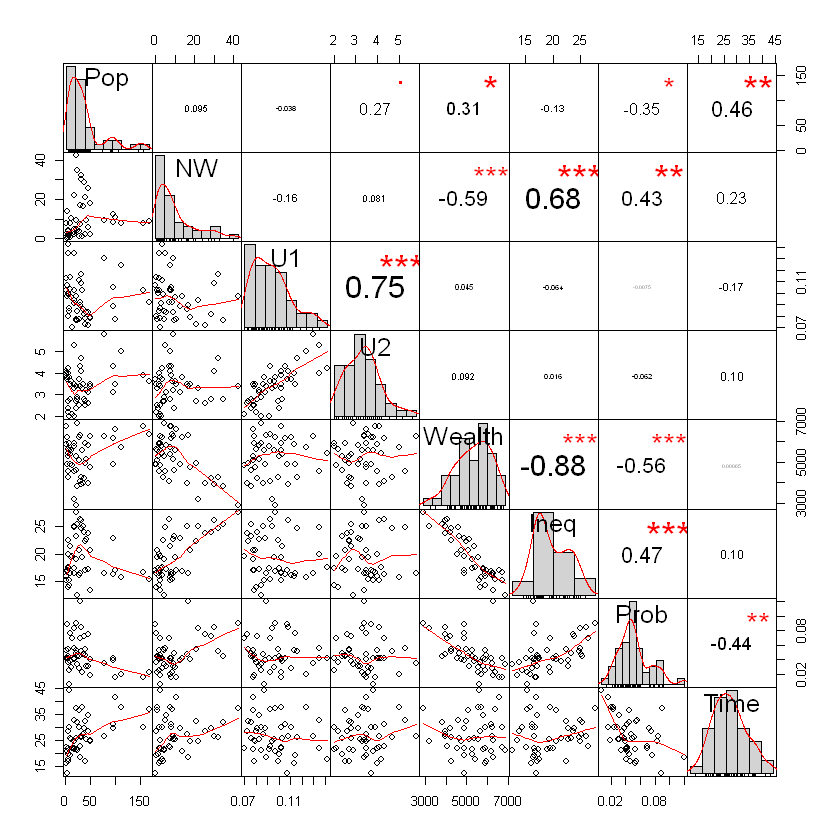

In [9]:
my_data2 <- uscrime[,8:15]
chart.Correlation(my_data2, histogram = TRUE, pch = 25)

The correlation charts above show the factors that are significant (ones with 2-3 asterisks)

We can pick a combination of factors that have the lowest p-values, and choose 5-6 from them to use in our reduced model

|Variable	 	|Description|
| ---           | ---       |
|M		        |percentage of males aged 14–24 in total state population|
|Ed		        |mean years of schooling of the population aged 25 years or over|
|Po1		    |per capita expenditure on police protection in 1960|
|U2		        |unemployment rate of urban males 35–39|
|U1		        |unemployment rate of urban males 14–24|
|Wealth		    |median value of transferable assets or family income|
|Ineq		    |income inequality: percentage of families earning below half the median income|
|Prob		    |probability of imprisonment: ratio of number of commitments to number of offenses|
|So		        |indicator variable for a southern state|


In [10]:
# build regression model
set.seed(42)
model_2 <- lm(Crime ~ + M + Ed + Po1 + U2 + Ineq + Prob, data = uscrime)
pred_2 <- predict(model_2, test_dataFrame)

cat("predicted crime rate is: ", pred_2)

predicted crime rate is:  1304.245

In [11]:
summary(model_2)


Call:
lm(formula = Crime ~ +M + Ed + Po1 + U2 + Ineq + Prob, data = uscrime)

Residuals:
    Min      1Q  Median      3Q     Max 
-470.68  -78.41  -19.68  133.12  556.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5040.50     899.84  -5.602 1.72e-06 ***
M             105.02      33.30   3.154  0.00305 ** 
Ed            196.47      44.75   4.390 8.07e-05 ***
Po1           115.02      13.75   8.363 2.56e-10 ***
U2             89.37      40.91   2.185  0.03483 *  
Ineq           67.65      13.94   4.855 1.88e-05 ***
Prob        -3801.84    1528.10  -2.488  0.01711 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 200.7 on 40 degrees of freedom
Multiple R-squared:  0.7659,	Adjusted R-squared:  0.7307 
F-statistic: 21.81 on 6 and 40 DF,  p-value: 3.418e-11


In [12]:
set.seed(42)
model_3 <- lm(Crime ~ M + Ed + Po1 + U1 + Ineq + Prob, data=uscrime)
pred_3 <- predict(model_3, test_dataFrame)

cat("predicted crime rate is: ", pred_3)


predicted crime rate is:  1381.844

In [13]:
summary(model_3)


Call:
lm(formula = Crime ~ M + Ed + Po1 + U1 + Ineq + Prob, data = uscrime)

Residuals:
    Min      1Q  Median      3Q     Max 
-520.02 -105.29    0.92  120.65  546.47 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4453.70     888.74  -5.011 1.14e-05 ***
M              89.60      33.78   2.652 0.011406 *  
Ed            163.61      43.43   3.767 0.000533 ***
Po1           123.58      14.19   8.707 8.93e-11 ***
U1           1959.71    1792.65   1.093 0.280850    
Ineq           68.76      14.53   4.732 2.77e-05 ***
Prob        -3878.41    1592.80  -2.435 0.019447 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 209.2 on 40 degrees of freedom
Multiple R-squared:  0.7455,	Adjusted R-squared:  0.7074 
F-statistic: 19.53 on 6 and 40 DF,  p-value: 1.719e-10


In [14]:
set.seed(42)
model_4 <- lm(Crime ~ M + Ed + Po1 + U1 + U2 + Prob, data=uscrime)

pred_4 <- predict(model_4, test_dataFrame)

cat("predicted crime rate is: ", pred_4)


predicted crime rate is:  1094.202

In [15]:
summary(model_4)


Call:
lm(formula = Crime ~ M + Ed + Po1 + U1 + U2 + Prob, data = uscrime)

Residuals:
    Min      1Q  Median      3Q     Max 
-647.63 -138.83  -37.49  165.17  514.52 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3135.52     990.12  -3.167  0.00295 ** 
M             155.32      39.23   3.960  0.00030 ***
Ed            108.45      52.75   2.056  0.04635 *  
Po1            81.68      18.48   4.420 7.36e-05 ***
U1          -4706.39    3741.52  -1.258  0.21573    
U2            185.81      89.02   2.087  0.04328 *  
Prob        -2840.35    1876.56  -1.514  0.13799    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 248.1 on 40 degrees of freedom
Multiple R-squared:  0.6421,	Adjusted R-squared:  0.5884 
F-statistic: 11.96 on 6 and 40 DF,  p-value: 1.196e-07


One can also use the `step()` on the 15-factor model to pick the optimal factors to use in the regression model

In [16]:
step(model_1)

Start:  AIC=514.65
Crime ~ M + So + Ed + Po1 + Po2 + LF + M.F + Pop + NW + U1 + 
    U2 + Wealth + Ineq + Prob + Time

         Df Sum of Sq     RSS    AIC
- So      1        29 1354974 512.65
- LF      1      8917 1363862 512.96
- Time    1     10304 1365250 513.00
- Pop     1     14122 1369068 513.14
- NW      1     18395 1373341 513.28
- M.F     1     31967 1386913 513.74
- Wealth  1     37613 1392558 513.94
- Po2     1     37919 1392865 513.95
<none>                1354946 514.65
- U1      1     83722 1438668 515.47
- Po1     1    144306 1499252 517.41
- U2      1    181536 1536482 518.56
- M       1    193770 1548716 518.93
- Prob    1    199538 1554484 519.11
- Ed      1    402117 1757063 524.86
- Ineq    1    423031 1777977 525.42

Step:  AIC=512.65
Crime ~ M + Ed + Po1 + Po2 + LF + M.F + Pop + NW + U1 + U2 + 
    Wealth + Ineq + Prob + Time

         Df Sum of Sq     RSS    AIC
- Time    1     10341 1365315 511.01
- LF      1     10878 1365852 511.03
- Pop     1     14127 13691


Call:
lm(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
    data = uscrime)

Coefficients:
(Intercept)            M           Ed          Po1          M.F           U1  
   -6426.10        93.32       180.12       102.65        22.34     -6086.63  
         U2         Ineq         Prob  
     187.35        61.33     -3796.03  


The `step()` regression had the lowets AIC score for (M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob) as factors for the model

In [17]:
model_5 <- lm(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
        data = uscrime)
summary(model_5)


Call:
lm(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
    data = uscrime)

Residuals:
    Min      1Q  Median      3Q     Max 
-444.70 -111.07    3.03  122.15  483.30 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6426.10    1194.61  -5.379 4.04e-06 ***
M              93.32      33.50   2.786  0.00828 ** 
Ed            180.12      52.75   3.414  0.00153 ** 
Po1           102.65      15.52   6.613 8.26e-08 ***
M.F            22.34      13.60   1.642  0.10874    
U1          -6086.63    3339.27  -1.823  0.07622 .  
U2            187.35      72.48   2.585  0.01371 *  
Ineq           61.33      13.96   4.394 8.63e-05 ***
Prob        -3796.03    1490.65  -2.547  0.01505 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 195.5 on 38 degrees of freedom
Multiple R-squared:  0.7888,	Adjusted R-squared:  0.7444 
F-statistic: 17.74 on 8 and 38 DF,  p-value: 1.159e-10


In [18]:
pred_5 <- predict(model_5, test_dataFrame)

cat("predicted crime rate is: ", pred_5)

predicted crime rate is:  1038.413

<font color="brown"><strong>Summary of all models used and their crime rate prediction </strong></font>

|Factors used | City crime rate prediction |R-squared |Adjusted R-squared|
| --- | --- | --- | --- |
|model with 15 factors |155 |0.803 | 0.708|
|model with only M + Ed + Po1 + U2 + Ineq + Prob |1304|0.766| 0.731| 
|model with M + Ed + Po1 + U1 + Ineq + Prob|1382|0.746 | 0.707|
|model with M + Ed + Po1 + U1 + U2 + Prob|1094|0.642|0.588|
|model with M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob|1038|0.789|0.744|

<br>
Here, we see that using `M + Ed + Po1 + U1 + U2 + Prob` as factors led to the lowerst R - squared value compared to our original 15-factor model and our crime prediction is `1094` which is not unusual given the data we have. However, how do we assess how good our model is? We cant just take the R - squared value as a measure of how well our model fits our data without doing any kind of validation.

Below, I will be using some of validation techniques we learned in week1.
We will assess the model that has the lowest R- squared from above and the 15 - factor model

In [19]:
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(caret)))

### Leave one out cross validation - LOOCV

In [20]:
# Define training control
set.seed(42) 
train.control <- trainControl(method = "LOOCV")
# Train the model
model_loov_15_factor <- train(Crime ~ ., data = uscrime, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_loov_15_factor)


# Train the model
model_loov_reduced <- train(Crime ~ M + Ed + Po1 + U1 + U2 + Prob, data = uscrime, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_loov_reduced)

Linear Regression 

47 samples
15 predictors

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 46, 46, 46, 46, 46, 46, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  274.424  0.5265155  209.0678

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

47 samples
 6 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 46, 46, 46, 46, 46, 46, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  267.9327  0.5179779  216.0377

Tuning parameter 'intercept' was held constant at a value of TRUE


### K-fold cross-validation

In [21]:
# Define training control
set.seed(42) 
train.control <- trainControl(method = "cv", number = 10)
# Train the model
model_kfold_15_factor <- train(Crime ~., data = uscrime, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_kfold_15_factor)

# Train the model
model_kfold_reduced <- train(Crime ~ M + Ed + Po1 + U1 + U2 + Prob, data = uscrime, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_kfold_reduced)

Linear Regression 

47 samples
15 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 42, 42, 42, 43, 42, 44, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  253.4865  0.5549432  207.4127

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

47 samples
 6 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 42, 42, 41, 43, 43, 42, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  256.6908  0.5768985  212.5164

Tuning parameter 'intercept' was held constant at a value of TRUE


### Repeated K-fold cross-validation

In [22]:
# Define training control
set.seed(42) 
train.control <- trainControl(method = "repeatedcv", 
                              number = 5, repeats = 10)
# Train the model
model_kfold_repeated_15_factor <- train(Crime ~., data = uscrime, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_kfold_repeated_15_factor)

# Train the model
model_kfold_repeated_reduced <- train(Crime ~ M + Ed + Po1 + U1 + U2 + Prob, data = uscrime, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_kfold_repeated_reduced)

Linear Regression 

47 samples
15 predictors

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 37, 38, 38, 38, 37, 38, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  291.4658  0.5046935  227.7499

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

47 samples
 6 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 36, 38, 38, 38, 38, 37, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  264.4707  0.5670326  216.2465

Tuning parameter 'intercept' was held constant at a value of TRUE


### Summary for the model validation:

|Model|Type of cross validation |RMSE  | Rsquared| 
| --- | ---| ---| --- | 
| 15-factor model|Repeated K-fold cross-validation|291|   0.505| 
|Reduced model|Repeated K-fold cross-validation|264|   0.567|
| 15-factor model|K-fold cross-validation| 253 |  0.555|
|Reduced model|K-fold cross-validation|257 |  0.577|
| 15-factor model|Leave one out cross validation - LOOCV| 274|   0.527| 
|Reduced model|Leave one out cross validation - LOOCV|268|   0.518|

comparing the R-squared values from non-validated model vs the validated ones, we can see that we always need to validate our model and not blindly take R-squared as a performance metric of how good our model is because we risk overfitting.